# P3 - Open Food Facts - Exploration

## Import

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

C:\Users\cosic\AppData\Local\Temp\ipykernel_7896\3596355529.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv('../Source/openfoodfacts_clean.csv', sep='\t', low_memory=False)

In [7]:
data.describe(include='all')

,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,7957,7938,7957,7957,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000
unique,6876,2589,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lait demi-écrémé,U,B,a renseigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,237,4093,2934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,54.937287,1.468282,0.755978,7.684664,6.319379,0.555227,2.333962,1.255249,0.494194,4.308282
std,NaN,NaN,NaN,NaN,28.197701,1.651336,1.612437,4.764374,5.801604,0.901055,3.680309,7.635214,3.006010,4.926340
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,34.894837,0.060000,0.000000,4.430000,1.700000,0.000000,0.200000,0.012700,0.005000,1.000000
50%,NaN,NaN,NaN,NaN,52.103250,0.900000,0.200000,7.006000,5.000000,0.140000,1.100000,0.120000,0.047244,2.000000
75%,NaN,NaN,NaN,NaN,80.305927,2.560000,1.000000,11.370000,10.500000,0.900000,3.200000,0.762000,0.300000,6.000000


In [8]:
data.dtypes

product_name                object
brands                      object
nutrition_grade_fr          object
pnns_groups_1               object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition_score_fr_100g    float64
dtype: object

## Repartition des produits par categories

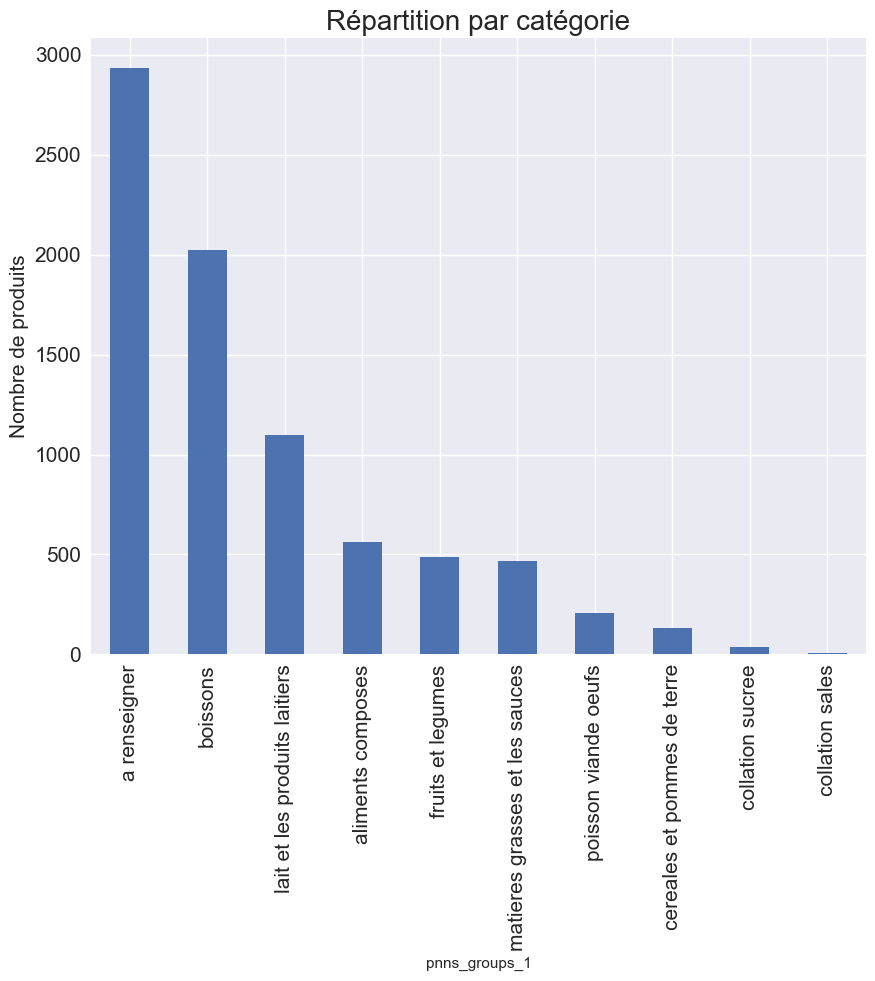

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

data['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

In [12]:
cat_a_renseigner = len(data[data['pnns_groups_1'] == 'a renseigner'])
cat_null = len(data[data['pnns_groups_1'].isnull()])
print(f"{(cat_a_renseigner + cat_null) / data.shape[0] * 100:.0f}% des produits sont sans catégories.")

37% des produits sont sans catégories.


## Repartition des marques

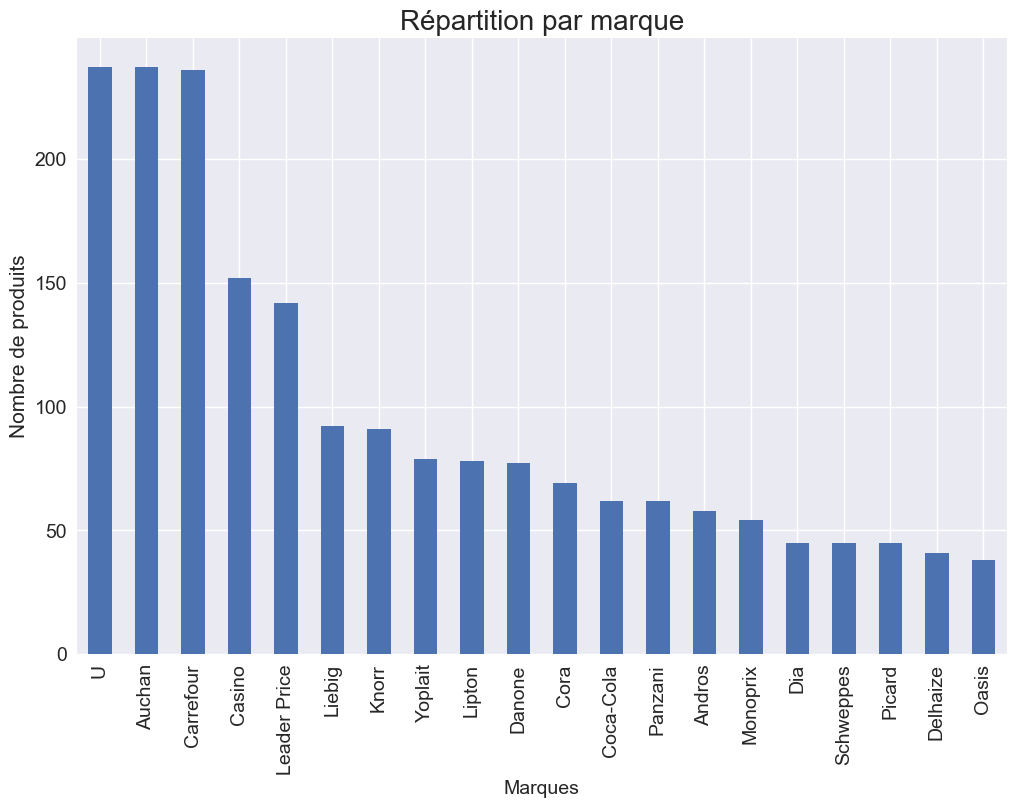

In [13]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
data['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

#### On remarque que les grandes distributions sont dans le top mais on remarque egalement des marques de produit

## Repartition des notes des produits

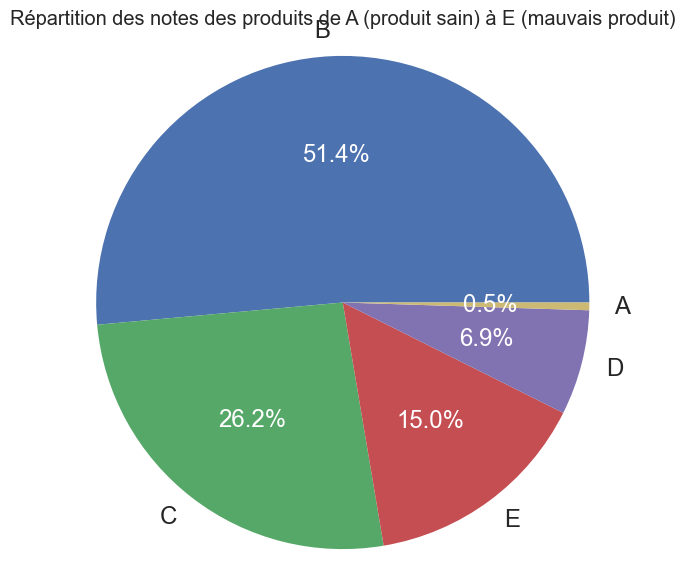

In [17]:
grades = data['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, autotexts = ax.pie(grades.values, labels=grades.index, autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size('xx-large')
for t in autotexts: 
    t.set_size('xx-large')
    t.set_color('w')
ax.set_title('Répartition des notes des produits de A (produit sain) à E (mauvais produit)', size='x-large')
ax.axis('equal')

plt.show()

#### On remarque que plus de la moitie des produits sont classe dans la Cat B

## Rapport des valeurs energetiques

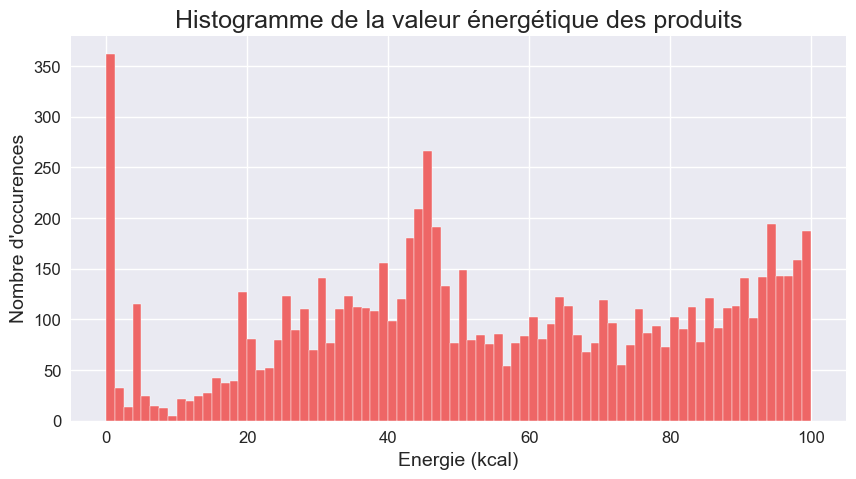

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['energy_100g'], bins=80, histtype='bar', color='#EE6666', edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size=18)
ax.set_xlabel("Energie (kcal)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

In [19]:
data.nlargest(10, 'energy_100g')

,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
14,préparation à base de lait de coco,Thai Agri Foods Co. Ltd.,C,a renseigner,99.904398,10.00,8.33,3.330,3.33,0.0,0.0,0.08382,0.033000,9.0
53,Beurre D'arachide (croquant),Compliments,C,a renseigner,99.904398,6.65,8.00,6.463,3.00,1.0,3.0,0.00450,0.001772,6.0
59,Thon Pâle (émietté Dans L'eau),Clover leaf,B,a renseigner,99.904398,0.80,0.32,0.000,0.00,0.0,24.0,0.96012,0.378000,0.0
60,Thon pâle en morceau,Clover leaf,D,a renseigner,99.904398,1.31,0.20,1.800,0.00,0.0,20.0,3.20000,1.259843,11.0
61,Nutella,Ferrero,D,a renseigner,99.904398,2.19,2.00,15.310,11.00,1.0,1.0,10.00000,3.937008,13.0
63,Sauce à Lasagne,Gattuso,D,a renseigner,99.904398,4.50,2.00,11.000,8.00,1.0,4.0,4.50000,1.771654,12.0
70,"Mayo, Vraie Mayonnaise",Kraft,B,a renseigner,99.904398,4.45,1.50,11.523,0.00,0.0,0.1,0.07000,0.027559,2.0
96,Compote Rhubarbe,Bonne Maman,C,a renseigner,99.904398,0.27,0.00,21.850,20.00,0.0,0.0,0.00000,0.000000,5.0
174,Gäddsas,Ikea,C,matieres grasses et les sauces,99.904398,6.87,6.00,7.153,1.50,0.0,0.9,0.83000,0.326772,9.0
228,Jambon cuit sans couenne,"Dulano,Gebirgsjäger",C,poisson viande oeufs,99.904398,2.00,0.80,1.000,0.90,0.5,19.0,2.28600,0.900000,5.0


#### Top 10 des aproduits les plus calorifiques